# Introduction Natural Language Processing

## Data PreProcessing

In [2]:
# importing the module

import pandas as pd
import numpy as np
import nltk as nl
import os
import sys

In [7]:
print('Path location ', str(os.getcwd()))
mypath = os.path.join(os.path.dirname(os.getcwd()), 'Dataset')
print('Inside the dirs : ', os.listdir(mypath))

Path location  D:\WORKING\01 LEARNING\13 ABOUT DATA SCIENCE\PROJECTS\Introduction of NLP\Notebooks
Inside the dirs :  ['CyberBullyingIG.csv', 'PilkadaDKI-2017_Tweet.csv', 'Readme.md', '__init__.py']


In [8]:
# Get sample file please choose PilkadaDKI-2017_tweets.csv

myfile = os.path.join(mypath, 'PilkadaDKI-2017_Tweet.csv')
print(myfile)

D:\WORKING\01 LEARNING\13 ABOUT DATA SCIENCE\PROJECTS\Introduction of NLP\Dataset\PilkadaDKI-2017_Tweet.csv


In [22]:
Data = pd.read_csv(myfile, encoding = 'utf-8')
Data.dropna(how="any", inplace=True, axis=1)
Data.sample(10)

,Id,Sentiment,Pasangan Calon,Text Tweet
840,841,positive,Anies-Sandi,Saya percaya usaha kita tak sia-sia. Teruslah ...
519,520,positive,Ahok-Djarot,Paduan suara warga di balai kota #ahokdjarot
49,50,negative,Agus-Sylvi,Golput lebih tinggi daripada pemilih #AHY ya n...
284,285,positive,Agus-Sylvi,Bangga menjadi bagian dari perjuangannya <Face...
870,871,positive,Anies-Sandi,Alesha aja milih no.3.... Masa kita gak...!!! ...
651,652,negative,Anies-Sandi,Blunder sekali Pak @jokowi jika benar menteri ...
720,721,negative,Anies-Sandi,Paslon 3 #aniessandy curang kampanye masuk kel...
579,580,positive,Ahok-Djarot,#gue2 #kami2 #ahokdjarot #tetapahokdjarot #sua...
104,105,negative,Agus-Sylvi,Harusnya rakyat menangis melihat #AHY KALAH. B...
208,209,positive,Agus-Sylvi,#ahy


In [26]:
Data.describe(include = 'object')

,Sentiment,Pasangan Calon,Text Tweet
count,900,900,900
unique,2,3,898
top,positive,Agus-Sylvi,ahoker masih bully #AHY
freq,450,300,2


In [27]:
Data.groupby('Sentiment').describe()

Id                                                        
           count   mean         std    min     25%    50%     75%    max
Sentiment                                                               
negative   450.0  375.5  249.023538    1.0  113.25  375.5  637.75  750.0
positive   450.0  525.5  249.023538  151.0  263.25  525.5  787.75  900.0

In [29]:
Data['LengthToken'] = Data['Text Tweet'].apply(len)
Data.describe()

,Id,LengthToken
count,900.000000,900.000000
mean,450.500000,110.961111
std,259.951919,37.361024
min,1.000000,4.000000
25%,225.750000,88.000000
50%,450.500000,118.000000
75%,675.250000,136.000000
max,900.000000,348.000000


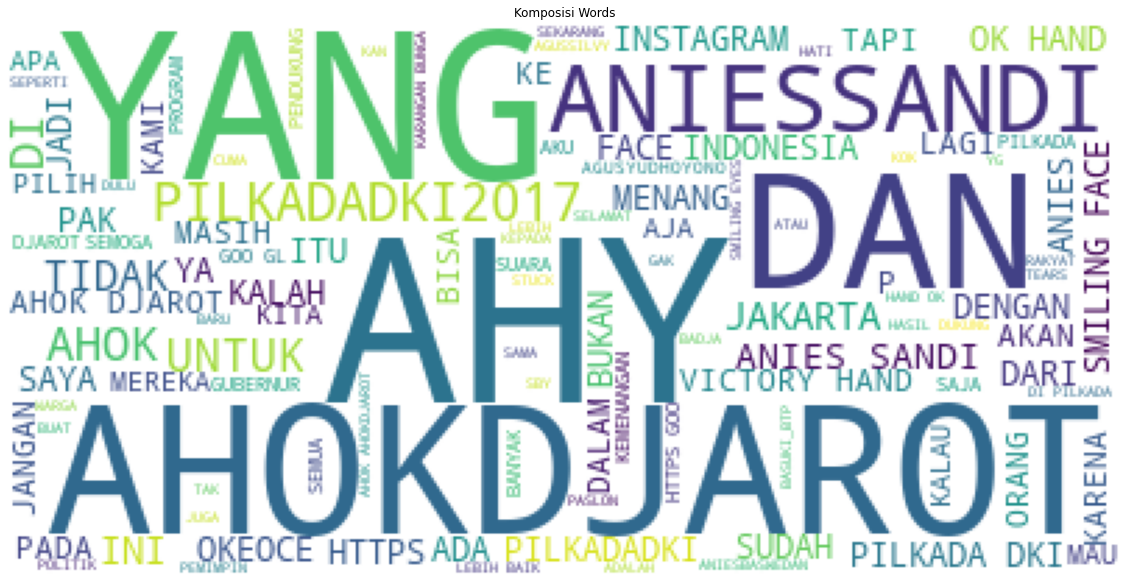

In [30]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wordcloud(dataframe):
    stopwords = set(STOPWORDS)
    plt.figure(figsize=(20,12))
    wordcloud = WordCloud(background_color="white",stopwords=stopwords).generate(" ".join([i for i in dataframe.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Komposisi Words")
    #plt.figure().set_figheight(30)
    plt.show()

wordcloud(Data['Text Tweet'])

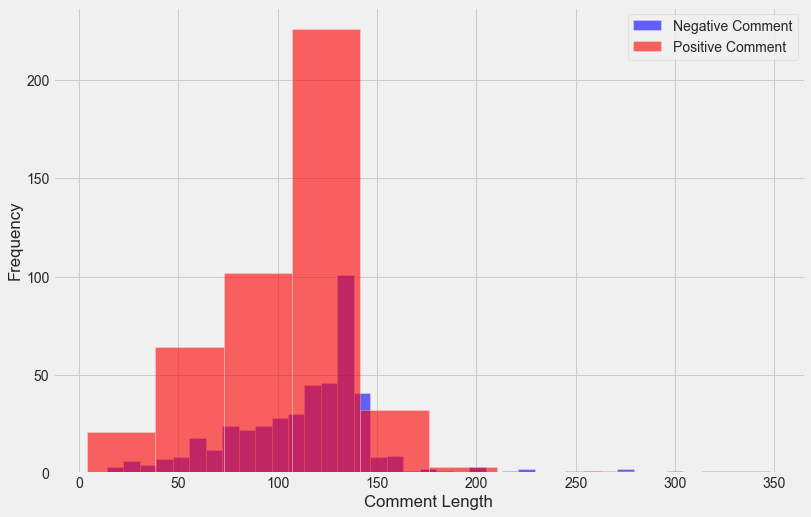

In [35]:
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12, 8))

Data[Data.Sentiment =='negative'].LengthToken.plot(bins=35, kind='hist', color='blue', 
                                       label='Negative Comment', alpha=0.6)
Data[Data.Sentiment =='positive'].LengthToken.plot(kind='hist', color='red', 
                                       label='Positive Comment', alpha=0.6)
plt.legend()
plt.xlabel("Comment Length")
plt.show()